In [1]:
import pandas as pd
import seaborn as sns

In [2]:
city_data = pd.read_csv("weather_losangelesUSA.csv")
global_data = pd.read_csv("weather_global.csv")
city_data.head()

,year,city,country,avg_temp
0,1849,Los Angeles,United States,15.71
1,1850,Los Angeles,United States,15.28
2,1851,Los Angeles,United States,15.53
3,1852,Los Angeles,United States,15.61
4,1853,Los Angeles,United States,16.27


In [3]:
global_data.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


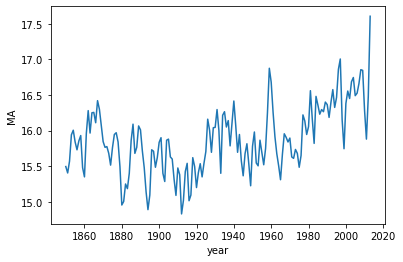

In [25]:
city_data["MA"]=city_data["avg_temp"].rolling(window=2).mean()
city = sns.lineplot(x="year",y="MA", data=city_data)
c = city.get_figure()
c.savefig("city_MA2.png")
# Moving average of 2 years still has a lot of noise

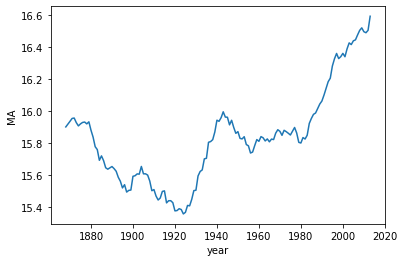

In [26]:
city_data["MA"]=city_data["avg_temp"].rolling(window=20).mean()
city = sns.lineplot(x="year",y="MA", data=city_data)
c = city.get_figure()
c.savefig("city_MA20.png")
# Graph is a little fuzzy but the pattern is more distinct

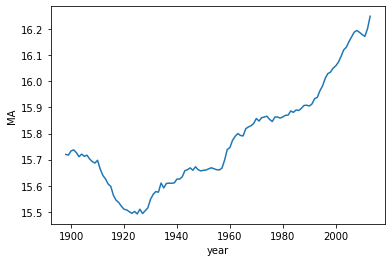

In [27]:
city_data["MA"]=city_data["avg_temp"].rolling(window=50).mean()
city = sns.lineplot(x="year",y="MA", data=city_data)
c = city.get_figure()
c.savefig("city_MA50.png")
# We start to lose data (e.g. spike in 1940) if moving average is based on 50 years

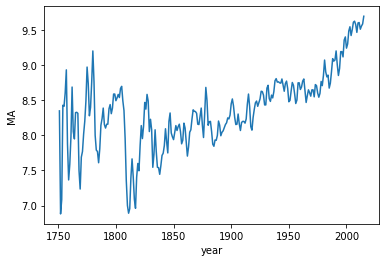

In [7]:
global_data["MA"]=global_data["avg_temp"].rolling(window=2).mean()
sns.lineplot(x="year",y="MA", data=global_data)

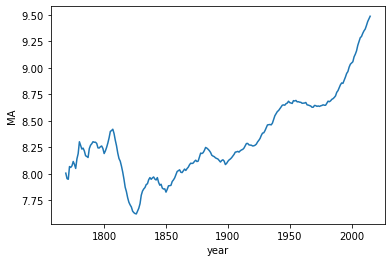

In [8]:
global_data["MA"]=global_data["avg_temp"].rolling(window=20).mean()
sns.lineplot(x="year",y="MA", data=global_data)

,year,avg_temp,MA
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,NaN


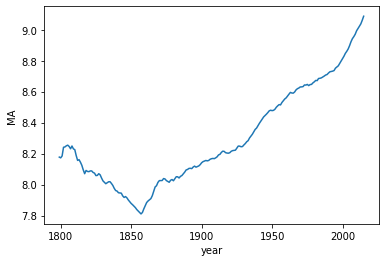

In [9]:
global_data["MA"]=global_data["avg_temp"].rolling(window=50).mean()
sns.lineplot(x="year",y="MA", data=global_data)
global_data.head()

In [10]:
global_data["MA"]=global_data["avg_temp"].rolling(window=20).mean()
global_data["location"] = "global"
city_data = city_data.loc[:,["year","avg_temp"]]
city_data["MA"]=city_data["avg_temp"].rolling(window=20).mean()
city_data["location"] = "los angeles"
combined = pd.concat([city_data, global_data])

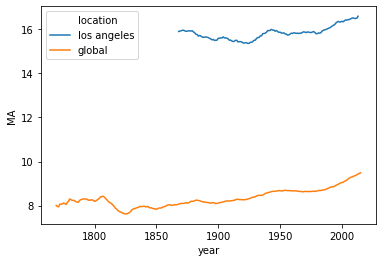

In [24]:
combined_plot=sns.lineplot(x="year", y="MA", hue="location",data=combined)
M = combined_plot.get_figure()
M.savefig("combined_plot.png")

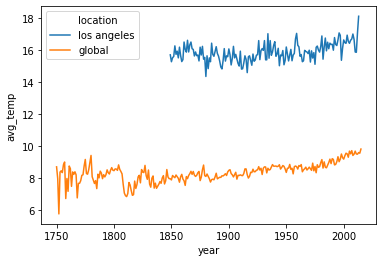

In [12]:
sns.lineplot(x="year", y="avg_temp", hue="location",data=combined)

In [13]:
city_data.describe()

,year,avg_temp,MA
count,165.000000,165.000000,146.000000
mean,1931.000000,15.881152,15.836514
std,47.775517,0.568754,0.295990
min,1849.000000,14.360000,15.358500
25%,1890.000000,15.500000,15.609000
50%,1931.000000,15.800000,15.828750
75%,1972.000000,16.240000,15.941875
max,2013.000000,18.120000,16.593500


In [14]:
global_data.describe()

,year,avg_temp,MA
count,266.000000,266.000000,247.000000
mean,1882.500000,8.369474,8.336142
std,76.931788,0.584747,0.393107
min,1750.000000,5.780000,7.621500
25%,1816.250000,8.082500,8.080000
50%,1882.500000,8.375000,8.243000
75%,1948.750000,8.707500,8.644500
max,2015.000000,9.830000,9.486000


In [15]:
combined["avg_temp_change"] = combined["avg_temp"].pct_change()
combined["MA_change"]=combined["avg_temp_change"].rolling(window=20).mean()

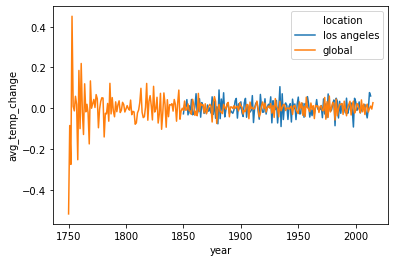

In [16]:
sns.lineplot(x="year", y="avg_temp_change", hue="location",data=combined)

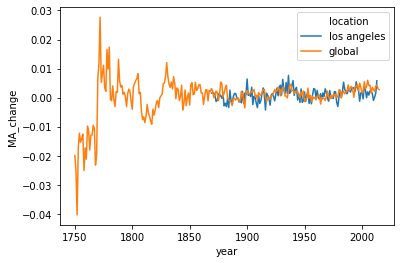

In [23]:
MA_pct_change = sns.lineplot(x="year", y="MA_change", hue="location",data=combined)
M = MA_pct_change.get_figure()
M.savefig("MA_pct_change.png")

In [18]:
combined

,year,avg_temp,MA,location,avg_temp_change,MA_change
0,1849,15.71,NaN,los angeles,NaN,NaN
1,1850,15.28,NaN,los angeles,-0.027371,NaN
2,1851,15.53,NaN,los angeles,0.016361,NaN
3,1852,15.61,NaN,los angeles,0.005151,NaN
4,1853,16.27,NaN,los angeles,0.042281,NaN
5,1854,15.74,NaN,los angeles,-0.032575,NaN
6,1855,15.94,NaN,los angeles,0.012706,NaN
7,1856,15.52,NaN,los angeles,-0.026349,NaN
8,1857,16.19,NaN,los angeles,0.043170,NaN
9,1858,15.67,NaN,los angeles,-0.032119,NaN
